<a href="https://colab.research.google.com/github/MohamadMahdiDarvishi/Pytorch/blob/main/Notebooks/Pytorch_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# November 2022
# Mahsa_Amini

# Custom Datasets Model

## Prerequrities

In [ ]:
# Imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import torch
from torch import nn

In [ ]:
torch.__version__
# setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

## 1 . Get Data

our dataset is subset of Food101 dataset

101 classes of datasets

1000 image per each dataset (750 training, 250 testing)

**but** Our dataset starts with 3 classes of food and only 10% of the images (~75 training, 25 testing)

**why ?**

When starting out ML projects, it's important to try things on a small scale and then increase the scale when necessary

In [ ]:
# Imports
import requests
import zipfile
from pathlib import Path

In [ ]:
# Creating folder for our data and setuping path for that
data_folder = Path("Data/")
image_path = data_folder / "pizza_steak_sushi" # or data_folder = Path("Data/pizza_steak_sushi")

In [ ]:
# is-else condition for creating image_path folder
if image_path.is_dir() :
  print(f"image folder : {image_path} exists skiping creating folder !")
else :
  image_path.mkdir(parents=True,exist_ok=True)
  print("image_path folder created !")

image folder : Data/pizza_steak_sushi exists skiping creating folder !


In [ ]:
# Download pizza , steak and suhsi data
with open(data_folder / "pizza_steak_sushi.zip" ,"wb") as f :
  request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip")
  print("Downloading pizza, steak , suhsi data...")
  f.write(request.content)

In [ ]:
with zipfile.ZipFile(data_folder / "pizza_steak_sushi.zip") as zip_ref :
    print("Unzipping pizza, steak and sushi data...")
    zip_ref.extractall(image_path)

Unzipping pizza, steak and sushi data...


## 2 . Data exploration and data preparation   

In [ ]:
import os

def walk_through(dir_path) :
  for dirpath , dirnames , filenames in os.walk(dir_path) :
      print(f"there is directories : {dirnames} and number of images : {len(filenames)} in {dirpath}")

In [ ]:
walk_through(image_path)

there is directories : ['train', 'test'] and number of images : 0 in Data/pizza_steak_sushi
there is directories : ['pizza', 'steak', 'sushi'] and number of images : 0 in Data/pizza_steak_sushi/train
there is directories : [] and number of images : 78 in Data/pizza_steak_sushi/train/pizza
there is directories : [] and number of images : 75 in Data/pizza_steak_sushi/train/steak
there is directories : [] and number of images : 72 in Data/pizza_steak_sushi/train/sushi
there is directories : ['pizza', 'steak', 'sushi'] and number of images : 0 in Data/pizza_steak_sushi/test
there is directories : [] and number of images : 25 in Data/pizza_steak_sushi/test/pizza
there is directories : [] and number of images : 19 in Data/pizza_steak_sushi/test/steak
there is directories : [] and number of images : 31 in Data/pizza_steak_sushi/test/sushi


In [ ]:
# Setup train and testing paths
train_dir = data_folder/"pizza_steak_sushi"/"train"
test_dir = data_folder/"pizza_steak_sushi"/"test"

### 2.1 Visualizing images
**Goals :**

1 . Get all of the image paths (using `glob`)

2 . Pick a random image path using Python's `random.choice()`

3 . Get the image class name using `pathlib.Path.parent.stem`

4 . Using Python `PIL` library for opening images and visualizing in addition to `matplotlib.pyplot`

5 . adding metadata  

*extracurriculums :*

**what does `pathlib.Path.parent.stem` do ?**

The final path component, without its suffix

**what does `glob` do ?**

glob (short for global) is used to return all file paths that match a specific pattern. We can use glob to search for a specific file pattern, or perhaps more usefully, search for files where the filename matches a certain pattern by using wildcard characters

In [ ]:
image_path

PosixPath('Data/pizza_steak_sushi')

#### 2.1.1 Visualizing using `PIL` package

random image_path : Data/pizza_steak_sushi/train/pizza/853441.jpg
image class : pizza
image height : 512
image width : 384


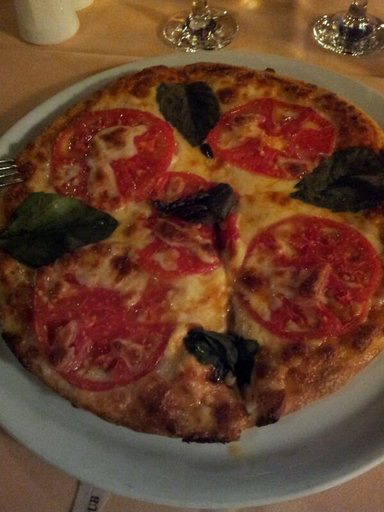

In [ ]:
# Imports
import random
from PIL import Image

# set seed
random.seed(42)

# 1. Get all image paths
image_path_list = list(image_path.glob("*/*/*.jpg"))

# 2. make a random choice
image_path_choosen = random.choice(image_path_list)

# 3. Get image class from path name
image_choosen_class = image_path_choosen.parent.stem

# 4. visualize(open) image
img = Image.open(image_path_choosen)

# 5. printing metadata
print(f"random image_path : {image_path_choosen}")
print(f"image class : {image_choosen_class}")
print(f"image height : {img.height}")
print(f"image width : {img.width}")

img

#### 2.1.2 Visualizing using `matplotlib.pyplot`

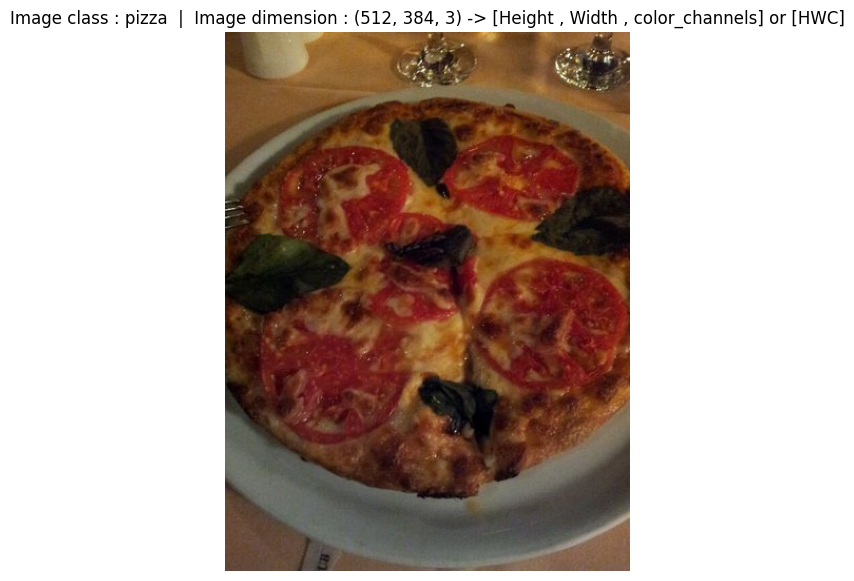

In [ ]:
# Imports
import numpy as np
import matplotlib.pyplot as plt

# 1.Turn the image into an array
image_as_array = np.asarray(img)

# 2.visualizing
plt.figure(figsize=(10,7))
plt.imshow(image_as_array)
plt.title(f"Image class : {image_choosen_class}  |  Image dimension : {image_as_array.shape} -> [Height , Width , color_channels] or [HWC]")
plt.axis(False) ;


## 3 . Transforming data

before we can use our images data with PyTorch :

1 . Turn your target data into tensors (Numerical representation of images)

2 . Turn it into a `torch.utils.data.Dataset` and subsequently a `torch.utils.data.DataLoader`

In [ ]:
# Imports
import torch
from torch.utils.data import DataLoader
from torchvision import datasets , transforms

### 3.1 Transforming data with `torchvision.transforms`

Transforms help you get your images ready to be used with a model/perform data augmentat

ion https://pytorch.org/vision/stable/transforms.html

In [ ]:
# Write a data (image)transformer (transform) for image
data_transformer = transforms.Compose([
    # Resize our images to 64x64
    transforms.Resize(size=(64,64)) ,
    # Flip the images randomly on the horizontal
    transforms.RandomHorizontalFlip(p=0.5) , # p works as given probability
    # Turn the image into a torch.Tensor
    transforms.ToTensor()
])

In [ ]:
data_transformer(img).shape

torch.Size([3, 64, 64])

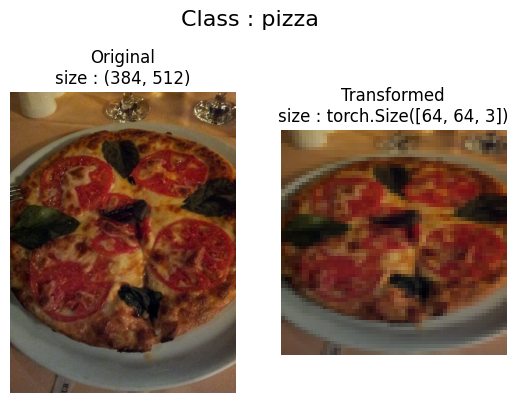

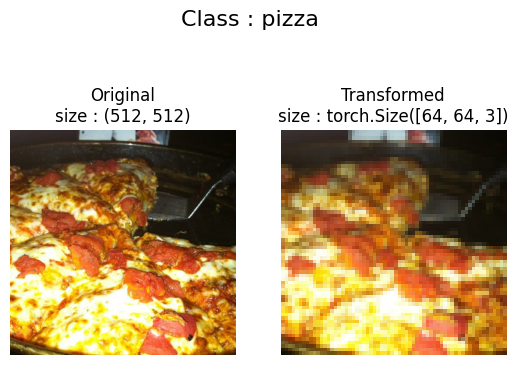

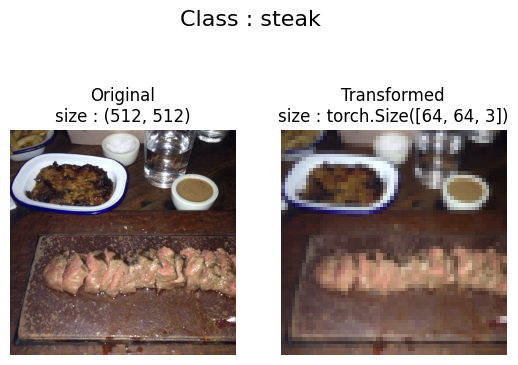

In [ ]:
def plot_transformed_images(image_path : list , transform , n = 3 , seed = None) :
  """
    select random image path and transforms them and finally
    plot them and compare vs original version
    params :
      n = number of images for ploting
      seed = seed adjusted for ploting
      tranform = image transformer

  """
  if seed :
     random.seed(seed)

# sampling image paths
  image_sample = random.sample(image_path , k = n)
  for image_paths in image_sample :
    with Image.open(image_paths) as f:
      fig , ax = plt.subplots(nrows=1,ncols=2)
    # Plot original Image
      ax[0].imshow(f) ;
      ax[0].set_title(f"Original\nsize : {f.size}") ;
      ax[0].axis(False) ;
    # Plot transformed Image
      transformed_images = data_transformer(f).permute(1,2,0) # (C , H , W) -> (H , W , C)
      ax[1].imshow(transformed_images) ;
      ax[1].set_title(f"Transformed\nsize : {transformed_images.shape}") ;
      ax[1].axis("off") ;

    # Adding subtitle for figure
      fig.suptitle(f"Class : {image_paths.parent.stem}",fontsize=16)

plot_transformed_images(image_path=image_path_list,
                        transform=data_transformer,
                        n=3 ,
                        seed = 42)

## 4 . Loading Image Data

### 4.1 Option 1 : Using `ImageFolder`

`ImageFolder`  ->  `torch.vision.datasets.ImageFolder`

**Tip :** Actully we are using `ImageFolder` to create datasets

In [ ]:
# option 1 : ImageFolder
from torchvision import datasets

train_data = datasets.ImageFolder(root=train_dir,
                                  transform = data_transformer ,
                                  target_transform=None ) # modifying transform for target data(lables)

test_data = datasets.ImageFolder(root = test_dir ,
                                 transform  = data_transformer ,
                                 target_transform = None)

train_data , test_data

(Dataset ImageFolder
     Number of datapoints: 225
     Root location: Data/pizza_steak_sushi/train
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=warn)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 75
     Root location: Data/pizza_steak_sushi/test
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=warn)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ))

In [ ]:
train_dir , test_dir

(PosixPath('Data/pizza_steak_sushi/train'),
 PosixPath('Data/pizza_steak_sushi/test'))

In [ ]:
data_classes = train_data.classes
# or
data_classes_dict = train_data.class_to_idx

data_classes_dict , data_classes

({'pizza': 0, 'steak': 1, 'sushi': 2}, ['pizza', 'steak', 'sushi'])

In [ ]:
len(train_data) , len(test_data)

(225, 75)

In [ ]:
# Creat a random choice
suggest = random.choice(range(0,225))
# choosing one of train data images
train_data.samples[suggest]

('Data/pizza_steak_sushi/train/pizza/38349.jpg', 0)

**Tip :** we use `samples` method to enumerate Images data by tuples containing Image location and its lable

**Tip :** also indexing directly on `train_data` would give us a list Images data (*tensors*)

In [ ]:
# indexing training data
random.seed(42)
img , label = train_data[random.choice(range(0,255))]
print(f"the image shape is : {img.shape}")
print(f"the label data type is : {type(label)}")

the image shape is : torch.Size([3, 64, 64])
the label data type is : <class 'int'>


the Original image shape : torch.Size([3, 64, 64])     ->     [color_channel , height , width]
the permuted image shape : torch.Size([64, 64, 3])     ->     [height , width , color_channel]


<ipython-input-25-065fec59bde8>:8: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,1);


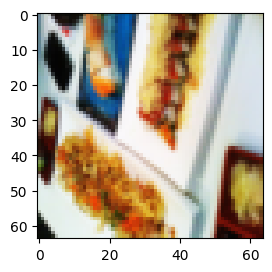

In [ ]:
# Rearrange dimensions order (enabling plotting)
img_permute = img.permute(2,1,0)
print(f"the Original image shape : {img.shape}     ->     [color_channel , height , width]")
print(f"the permuted image shape : {img_permute.shape}     ->     [height , width , color_channel]")

# Plot permuted image
plt.axis("off") ;
plt.subplot(1,2,1);
plt.imshow(img_permute);

#### 4.1.1 Turning loaded images into `Dataloader`s
by turning our dataset into `Dataloader` our model can see `BATCH_SIZE` images at same time  

In [ ]:
# Counting cpu core's you will see why
import os
os.cpu_count()

2

In [ ]:
# Turning train and test datasets into dataloaders
from torch.utils.data import DataLoader
BATCH_SIZE = 1

train_dataloader = DataLoader(dataset = train_data ,
                              batch_size = BATCH_SIZE ,
                              num_workers=1 ,
                              shuffle = True)
test_dataloader = DataLoader(dataset = test_data ,
                             batch_size = BATCH_SIZE ,
                             num_workers = 1 ,
                             shuffle =False )
train_dataloader , test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7f77f4127340>,
 <torch.utils.data.dataloader.DataLoader at 0x7f77f3f952d0>)

Image shape is : torch.Size([1, 3, 64, 64])  ->  [batch_size , color_channel , height , width]
Label shape is : torch.Size([1])


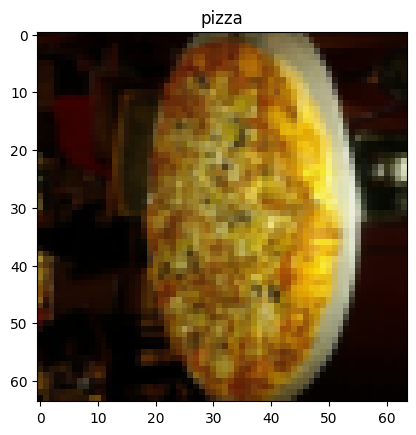

In [ ]:
# plotting an instance image
img , label = next(iter(test_dataloader))
print(f"Image shape is : {img.shape}  ->  [batch_size , color_channel , height , width]")
print(f"Label shape is : {label.shape}")
plt.imshow(img.squeeze(dim=0).permute(2,1,0).numpy()) #  Tip 3 important steps : 1(squeezing batch_size dimension) 2(permuting for putting color channel dimension as third) 3(and matplotlib only accepts numpy)
plt.title(test_data.classes[label.item()]) ;

### 4.2 Option 2 Using custom dataset
**pros :**

*   data set could be contained of almost any thing
*   not limiting to pytorch built-in datasets

**cons :**

*   bringing problem prone datasets
*   not be able of using pytorch automations

In [ ]:
# Imports
import os
import pathlib
import torch

from PIL import Image
from  torchvision import transforms
from torch.utils.data import Dataset
from typing import Tuple , Dict , List

### 4.2.1 Create a helper function to find classes

**hints :**

1.   get classes names using `os.scandir()`
2.   rais an `FileNotFoundError` when can not find images file
3.   turn classes into a dict and list

In [ ]:
def class_finder(target_directory : str) -> Tuple[list[str] , Dict[str , int]]:
  # 1 . finding classes names
  classes  = list(np.unique(np.asarray(sorted(entry.name for entry in list(target_directory.glob("*"))))))
  class_to_idx = {classes[i] : i for i in range(len(classes))}

  # 2 . raise a FileNotFoundError when classes not found
  if classes == None :
    raise FileNotFoundError("The folder selected maybe incorrect")

  # 3 . returning a dict and tuple as output
  return classes  , class_to_idx

In [ ]:
class_finder(train_dir)

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

### 4.2.2 Create a **custom dataset** to replicate `ImageFolder`

In [ ]:
from torch.utils.data import Dataset

class ImageFolderCustom(Dataset) :
  def __init__(self ,
               target_directory : str,
               transform =None ) :
    self.path = list(target_directory.glob("*/*.jpg"))
    self.transform = transform
    self.classes , self.class_to_idx = class_finder(target_directory)

  def load_image(self , index : int) :
    image = self.path[index]
    return Image.open(image)

  def __len__(self) :
    return len(self.path)

  def __getitem__(self , index : int) :
    img = self.load_image(index)
    class_name = self.path[index].parent.name
    class_idx = self.class_to_idx[class_name]
    if self.transform :
      return self.transform(img) , class_name , class_idx
    else :
      return img , class_name , class_idx

In [ ]:
# Create a transformer
from torchvision import transforms

train_transform  = transforms.Compose([
                                  transforms.Resize((64,64)) ,
                                  transforms.RandomHorizontalFlip(p = 0.5) ,
                                  transforms.ToTensor()
])
test_transform = transforms.Compose([
                                  transforms.Resize((64,64)),
                                  transforms.ToTensor()
])
train_transform , test_transform

(Compose(
     Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=warn)
     RandomHorizontalFlip(p=0.5)
     ToTensor()
 ),
 Compose(
     Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=warn)
     ToTensor()
 ))

In [ ]:
# Creating our train and test data classes
train_data_custom =  ImageFolderCustom(target_directory=train_dir ,
                                transform=train_transform )
test_data_custom = ImageFolderCustom(target_directory = test_dir ,
                              transform = test_transform)
train_data_custom , test_data_custom

(<__main__.ImageFolderCustom at 0x7f77f4055d20>,
 <__main__.ImageFolderCustom at 0x7f77f4057340>)

In [ ]:
train_data_custom[0]

(tensor([[[0.0627, 0.0627, 0.0667,  ..., 0.0549, 0.0549, 0.0588],
          [0.0627, 0.0627, 0.0549,  ..., 0.0431, 0.0588, 0.0588],
          [0.0627, 0.0588, 0.0549,  ..., 0.0431, 0.0510, 0.0510],
          ...,
          [0.6627, 0.6588, 0.6510,  ..., 0.9059, 0.9020, 0.8980],
          [0.6510, 0.6431, 0.6627,  ..., 0.9020, 0.9059, 0.9059],
          [0.7059, 0.7294, 0.7294,  ..., 0.8980, 0.9098, 0.9098]],
 
         [[0.0588, 0.0549, 0.0588,  ..., 0.0549, 0.0549, 0.0588],
          [0.0588, 0.0549, 0.0471,  ..., 0.0471, 0.0588, 0.0549],
          [0.0588, 0.0549, 0.0471,  ..., 0.0471, 0.0471, 0.0471],
          ...,
          [0.4275, 0.4235, 0.4235,  ..., 0.0706, 0.0667, 0.0588],
          [0.4196, 0.4157, 0.4431,  ..., 0.0745, 0.0706, 0.0627],
          [0.4784, 0.5098, 0.5098,  ..., 0.0784, 0.0745, 0.0667]],
 
         [[0.0824, 0.0824, 0.0902,  ..., 0.0863, 0.0902, 0.0941],
          [0.0824, 0.0784, 0.0706,  ..., 0.0706, 0.0824, 0.0824],
          [0.0902, 0.0784, 0.0706,  ...,

In [ ]:
train_data_custom.classes , len(train_data_custom)

(['pizza', 'steak', 'sushi'], 225)

### 4.2.3 Create a function to display random images
TODO list :
1.  take in a `Dataset` object and another inputs like : classes , how many images to visualize
2.  setting random seed for reproducability
3.  setup matplotlib
4.  loop through random samples
5.  make sure that our dimensions match [HWC]

In [ ]:
# Imports
import matplotlib.pyplot as plt
import random

# The Function
def random_visualization(dataset : Dataset ,
                         classes : List[str] = None,
                         n : int = 10 ,
                         display_shape : bool = False ,
                         seed : int = 42) :
    # Defining class if not inputed as the automation
    if not classes :
      classes  = dataset.classes
    random_indexes = random.choices(range(len(train_data_custom)),k=n)
    if seed :
      random.seed(seed)
    plt.figure(figsize=(16,8))
    for i in range(n) :
      plt.subplot(1,n,i+1);
      plt.imshow(dataset[i][0].permute(2,1,0))
      plt.axis("off");
      text_title = dataset[i][1]
      if display_shape :
        text_title = text_title + f"\nshape : {dataset[i][0].shape}"
      plt.title(text_title)

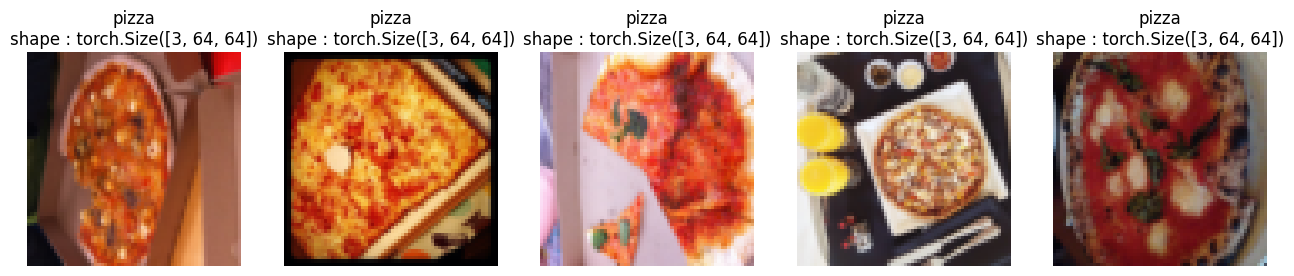

In [ ]:
random_visualization(train_data_custom ,
                     display_shape = True ,
                     n = 5 ,
                     seed = 45)

### 4.2.4 Turning custom loaded dataset into `Dataloader`

In [ ]:
from torch.utils.data import DataLoader

NUM_WORKER = os.cpu_count()
BATCH_SIZE = 1

train_dataloader_custom = DataLoader(dataset = train_data_custom,
                                     shuffle = True ,
                                     num_workers = NUM_WORKER,
                                     batch_size = BATCH_SIZE)
test_dataloader_custom = DataLoader(dataset = test_data_custom ,
                                    shuffle = False ,
                                    num_workers  = NUM_WORKER ,
                                    batch_size = BATCH_SIZE )
train_dataloader_custom , test_dataloader_custom

(<torch.utils.data.dataloader.DataLoader at 0x7f77f40c9fc0>,
 <torch.utils.data.dataloader.DataLoader at 0x7f77f40ca5c0>)

In [ ]:
img_custom , class_custom , label_custom = next(iter(train_dataloader_custom))
img_custom.shape , class_custom , label_custom

(torch.Size([1, 3, 64, 64]), ('sushi',), tensor([2]))

## 6 . other forms of transforms (data augmentation)

data augmenation is the act of making our model more inteligent by making its learning harder - and for more details you also could look at [DataAugmentation](https://arxiv.org/abs/2103.10158)


## 7 . Create a `TinyVGG` convloutional neural network without `data augmentation` (Model 0)

### 7.1 preparing data for model

In [ ]:
from torchvision import transforms , datasets # for using ImageFolder
from torch.utils.data import DataLoader
import os
# Creating transform

transform_aug = transforms.Compose([
    transforms.Resize(size=(64,64)),
    transforms.ToTensor()
])

# Loading train and test data
train_data_aug  = datasets.ImageFolder(root = train_dir ,
                                      transform = transform_aug)
test_data_aug = datasets.ImageFolder(root = test_dir,
                                    transform = transform_aug)

# creating train and test dataloaders
BATCH_SIZE = 32
NUM_WORKER = os.cpu_count()

train_dataloader_aug = DataLoader(dataset = train_data_aug,
                                  shuffle = True ,
                                  num_workers = NUM_WORKER,
                                  batch_size = BATCH_SIZE)
test_dataloader_aug = DataLoader(dataset = test_data_aug,
                                  shuffle = False ,
                                  num_workers = NUM_WORKER,
                                  batch_size = BATCH_SIZE)

train_dataloader_aug , test_dataloader_aug

(<torch.utils.data.dataloader.DataLoader at 0x7f77f3e869e0>,
 <torch.utils.data.dataloader.DataLoader at 0x7f77f3e87910>)

### 7.2 TinyVGG model class

In [ ]:
class  TinyVGG(nn.Module) :
  def __init__(self , input_shape : int ,
                      hidden_unit :int ,
                      output_shape :int ) :
    super().__init__()
    self.conv_block_1  = nn.Sequential(
        nn.Conv2d(in_channels = input_shape ,
                  out_channels  = hidden_unit ,
                  kernel_size = 3 ,
                  stride = 1 ,
                  padding  = 0) ,
        nn.ReLU() ,
        nn.Conv2d(in_channels = hidden_unit ,
                  out_channels = hidden_unit ,
                  kernel_size = 3 ,
                  stride  = 1 ,
                  padding  = 0) ,
        nn.ReLU() ,
        nn.MaxPool2d(kernel_size = 2,
                     stride  = 2)
    )
    self.conv_block_2  = nn.Sequential(
        nn.Conv2d(in_channels  = hidden_unit ,
                  out_channels = hidden_unit ,
                  kernel_size = 3 ,
                  stride = 1,
                  padding = 0),
        nn.ReLU() ,
        nn.Conv2d(in_channels = hidden_unit ,
                  out_channels  = hidden_unit ,
                  kernel_size  = 3,
                  stride = 1 ,
                  padding = 0),
        nn.ReLU() ,
        nn.MaxPool2d(kernel_size = 2,
                     stride = 2)
    )
    self.classifier = nn.Sequential(
        nn.Flatten() ,
        nn.Linear(in_features = hidden_unit * list(self.shape_calculator())[2] * list(self.shape_calculator())[3],
                  out_features = output_shape)
    )
  def shape_calculator(self) :
    random_tensor  = torch.randn(size=(BATCH_SIZE,3,64,64))
    result_tensor = self.conv_block_2(self.conv_block_1(random_tensor))
    return result_tensor.shape
  def forward(self, x) :
    x = self.classifier(self.conv_block_2(self.conv_block_1(x)))
    return x

In [ ]:
# creating an instance of our created model
model_0 = TinyVGG(input_shape = 3 ,
                  hidden_unit = 10 ,
                  output_shape = len(data_classes)).to(device)
model_0

TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=1690, out_features=3, bias=True)
  )
)

In [ ]:
# testing model on a single image
img , label = next(iter(test_dataloader_aug))
img.shape ,  label.shape

(torch.Size([32, 3, 64, 64]), torch.Size([32]))

In [ ]:
model_0(img.to(device)) , model_0(img.to(device)).shape

(tensor([[-0.0336,  0.0402,  0.0039],
         [-0.0343,  0.0391,  0.0084],
         [-0.0319,  0.0467,  0.0063],
         [-0.0338,  0.0402,  0.0044],
         [-0.0318,  0.0332,  0.0081],
         [-0.0295,  0.0354,  0.0094],
         [-0.0306,  0.0398,  0.0049],
         [-0.0365,  0.0351,  0.0149],
         [-0.0319,  0.0402,  0.0102],
         [-0.0338,  0.0415,  0.0120],
         [-0.0255,  0.0504,  0.0097],
         [-0.0353,  0.0427,  0.0053],
         [-0.0300,  0.0407,  0.0076],
         [-0.0351,  0.0416,  0.0070],
         [-0.0364,  0.0470,  0.0059],
         [-0.0371,  0.0391,  0.0042],
         [-0.0372,  0.0406,  0.0048],
         [-0.0338,  0.0416,  0.0054],
         [-0.0310,  0.0361,  0.0072],
         [-0.0330,  0.0376, -0.0003],
         [-0.0348,  0.0433,  0.0057],
         [-0.0344,  0.0350,  0.0134],
         [-0.0277,  0.0443,  0.0138],
         [-0.0324,  0.0430,  0.0047],
         [-0.0349,  0.0383,  0.0128],
         [-0.0360,  0.0323,  0.0037],
         [-0

**Tip :** Using `torchinfo` to be aware of every layer output

In [ ]:
# importing torchinfo
try :
  import torchinfo
except :
  ! pip install torchinfo
  import torchinfo

In [ ]:
from torchinfo import summary
summary(model = model_0 , input_size = (32 , 3 , 64 , 64))

Layer (type:depth-idx)                   Output Shape              Param #
TinyVGG                                  [32, 3]                   --
├─Sequential: 1-1                        [32, 10, 30, 30]          --
│    └─Conv2d: 2-1                       [32, 10, 62, 62]          280
│    └─ReLU: 2-2                         [32, 10, 62, 62]          --
│    └─Conv2d: 2-3                       [32, 10, 60, 60]          910
│    └─ReLU: 2-4                         [32, 10, 60, 60]          --
│    └─MaxPool2d: 2-5                    [32, 10, 30, 30]          --
├─Sequential: 1-2                        [32, 10, 13, 13]          --
│    └─Conv2d: 2-6                       [32, 10, 28, 28]          910
│    └─ReLU: 2-7                         [32, 10, 28, 28]          --
│    └─Conv2d: 2-8                       [32, 10, 26, 26]          910
│    └─ReLU: 2-9                         [32, 10, 26, 26]          --
│    └─MaxPool2d: 2-10                   [32, 10, 13, 13]          --
├─Sequentia

### 7.3 create train and test loop functions

*   train_step()
*   test_step()

In [ ]:
def train_step(dataloader : torch.utils.data.DataLoader ,
               model : TinyVGG ,
               loss_function : nn.Module ,
               optimizer : torch.optim.Optimizer ,
               device = device) :
    # put data on train mode
    model_0.train()
    # creating loss variables
    train_loss , train_acc = 0 , 0
    for batch , (X,y) in enumerate(dataloader) :
      # put data in target device
      X , y = X.to(device) , y.to(device)
      # 1 . do forward pass
      pred  =  model_0(X)
      # 2 . calculate the loss
      loss = loss_function(pred , y)
      train_loss += loss.item()
      # 3 . optimizer zero grade
      optimizer.zero_grad()
      # 4 . loss backward
      loss.backward()
      # 5 . optimizer step
      optimizer.step()
      # creating train lables for calculating train accuracy
      train_lables = torch.argmax(torch.softmax(pred,dim=1),dim=1)
      train_acc += (train_lables == y).sum().item() / len(y)
    # calculating the loss and accuracy
    train_loss = train_loss / len(dataloader)
    train_acc = train_acc /len(dataloader)
    return train_loss , train_acc

In [ ]:
def test_step(dataloader : torch.utils.data.DataLoader ,
              model : TinyVGG ,
              loss_function : nn.Module ,
              device = device) :
    # putting model on eval mode
    model.eval()
    # making loss and accuracy variables
    test_loss , test_acc = 0 , 0
    # using inference mode
    with torch.inference_mode() :
      for batch , (X , y) in enumerate(dataloader) :
        # putting data on target device
        X , y = X.to(device) , y.to(device)
        # making prediction
        test_pred = model(X)
        # calculating loss
        loss =loss_function(test_pred , y)
        test_loss += loss
        # making prediction lables
        test_lables = torch.argmax(test_pred, dim=1)
        test_acc += ((test_lables == y).sum().item() / len(y))
      # calculating test model accuracy and loss
      test_loss = test_loss.item() / len(dataloader)
      test_acc = test_acc / len(dataloader)
      return test_loss , test_acc

**Tip :** also we could  make a `train` function to train our model

In [ ]:
from tqdm.auto import tqdm

def train(model : TinyVGG ,
          train_dataloader : torch.utils.data.DataLoader ,
          test_dataloader : torch.utils.data.DataLoader,
          optimizer : torch.optim ,
          loss_function : nn. Module ,
          epochs : int = 5 ,
          device = device ) :
    # creating a dictionary as result
    result  = {"train_loss" : [] ,
               "train_acc" : [] ,
               "test_loss" : [] ,
               "test_acc" : []}
    for epoch in tqdm(range(epochs)) :
      train_loss , train_acc = train_step(model = model ,
                                          dataloader = train_dataloader ,
                                          loss_function = loss_function ,
                                          optimizer = optimizer ,
                                          device  = device)
      test_loss , test_acc = test_step(model = model ,
                                       dataloader = test_dataloader ,
                                       loss_function = loss_function ,
                                       device = device)
      result["train_loss"].append(train_loss)
      result["train_acc"] .append(train_acc)
      result["test_loss"].append(test_loss)
      result["test_acc"].append(test_acc)
      print(f"epoch : {epoch:.4f}    |    train_loss : {train_loss:.3f}     |   train_acc  :  {train_acc:.3f}      |     test_loss  :  {test_loss:.3f}      |      test_acc :  {test_acc:.3f}")

    return result

In [ ]:
from timeit import default_timer as timer

# set manual seed
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# setting number of epochs
NUM_EPOCH = 5

# creating loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params  = model_0.parameters(),
                             lr = 0.001)

# train
start_timer  = timer()
model_0_results = train(model = model_0,
                        train_dataloader = train_dataloader,
                        test_dataloader = test_dataloader ,
                        loss_function = loss_fn ,
                        optimizer = optimizer ,
                        epochs = NUM_EPOCH ,
                        device  = device )
end_timer = timer()
print(f"\n total training time is : {(end_timer - start_timer):.4f}")

  0%|          | 0/5 [00:00<?, ?it/s]

epoch : 0.0000    |    train_loss : 1.103     |   train_acc  :  0.316      |     test_loss  :  1.088      |      test_acc :  0.333
epoch : 1.0000    |    train_loss : 1.102     |   train_acc  :  0.316      |     test_loss  :  1.090      |      test_acc :  0.333
epoch : 2.0000    |    train_loss : 1.101     |   train_acc  :  0.347      |     test_loss  :  1.092      |      test_acc :  0.333
epoch : 3.0000    |    train_loss : 1.100     |   train_acc  :  0.347      |     test_loss  :  1.093      |      test_acc :  0.333
epoch : 4.0000    |    train_loss : 1.100     |   train_acc  :  0.347      |     test_loss  :  1.094      |      test_acc :  0.333

 total training time is : 12.7655


**Tip :** plotting `loss Curves` of *`model 0`*

In [ ]:
def plot_loss_curves(results : Dict[str , List[float]]) :
    # finding numbers of epochs
    sample  = list(results.keys())[0]
    epochs = range(len(results[sample]))

    plt.figure(figsize=(14,7))

    plt.subplot(1,2,1)
    plt.plot(epochs , results["train_loss"] , label = "train loss")
    plt.plot(epochs , results["test_loss"]  , label = "test loss")
    plt.title("Loss")
    plt.xlabel("epoch")
    plt.legend()

    plt.subplot(1,2,2)
    plt.plot(epochs , results["train_acc"] , label = "train accuracy")
    plt.plot(epochs , results["test_acc"]  , label = "test accuracy")
    plt.title("Accuracy")
    plt.xlabel("epoch")
    plt.legend()

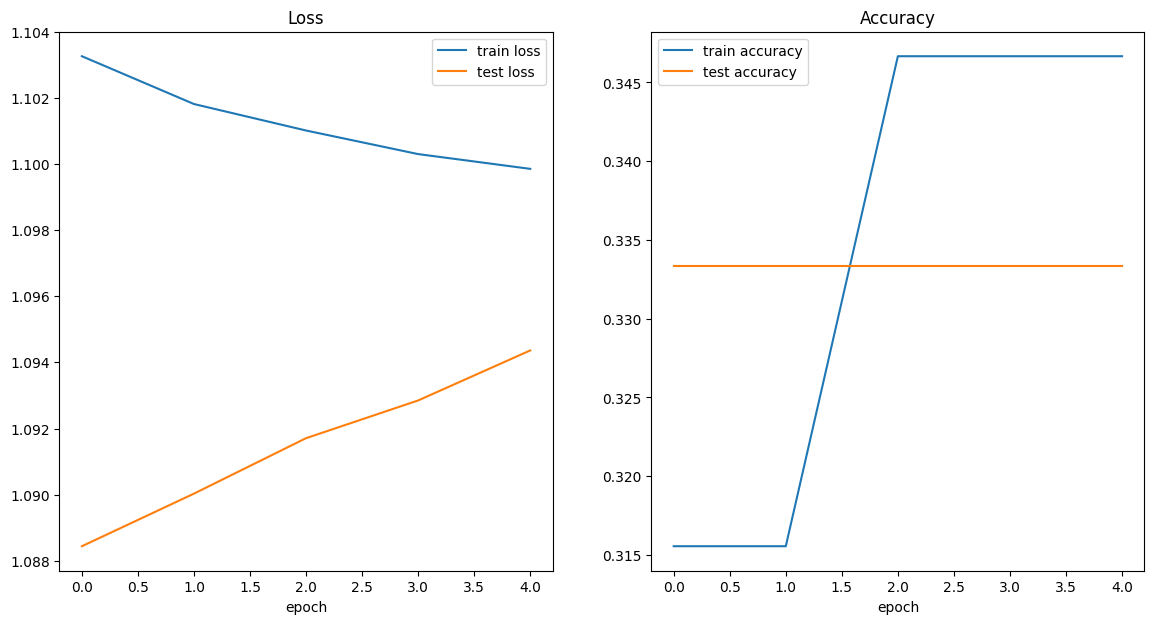

In [ ]:
plot_loss_curves(model_0_results)

## 8 . Create convloutinal neural networks with Data Augmentation (Model 1)

### 8.1 Prepare data for model

In [ ]:
from torchvision import transforms
# Creating transforms with data augmentation
train_transform_trivial = transforms.Compose([
    transforms.Resize(size=(64,64)),
    transforms.TrivialAugmentWide(num_magnitude_bins=31) ,
    transforms.ToTensor()
])
test_transform_trivial = transforms.Compose([
    transforms.Resize(size=(64,64)),
    transforms.ToTensor()
])
# Creating datasets
from torchvision import datasets
train_dataset_trivial  = datasets.ImageFolder(root = train_dir ,
                                              transform = train_transform_trivial)
test_dataset_trivial = datasets.ImageFolder(root = test_dir ,
                                            transform  = test_transform_trivial)
# Creating DataLoader
from torch.utils.data import DataLoader
import os

NUM_WORKER = os.cpu_count()
BATCH_SIZE = 32

train_dataloader_trivial = DataLoader(dataset= train_dataset_trivial ,
                                      batch_size = BATCH_SIZE ,
                                      shuffle = True ,
                                      num_workers= NUM_WORKER)
test_dataloader_trivial = DataLoader(dataset= test_dataset_trivial ,
                                      batch_size = BATCH_SIZE ,
                                      shuffle = False ,
                                      num_workers= NUM_WORKER)

In [ ]:
# setting seed
torch.manual_seed(42)
# Creating model
model_1 = TinyVGG(input_shape=len(train_dataset_trivial.classes),
                  hidden_unit= 10 ,
                  output_shape = 3) .to(device)
model_1

TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=1690, out_features=3, bias=True)
  )
)

In [ ]:
# setting manual seed
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# setting number of epochs
NUM_EPOCH = 5

# Creating loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optmizer = torch.optim.Adam(params = model_1.parameters(),
                            lr = 0.001)
# training model
from timeit import default_timer as timer

start_train_time  = timer()
model_1_results  = train(model = model_1,
                         train_dataloader = train_dataloader_trivial,
                         test_dataloader = test_dataloader_trivial,
                         epochs = NUM_EPOCH,
                         optimizer= optimizer ,
                         loss_function = loss_fn ,
                         device = device)
end_train_time = timer()

print(f"total training time iis : {end_train_time - start_train_time:.5f}")


  0%|          | 0/5 [00:00<?, ?it/s]

epoch : 0.0000    |    train_loss : 1.091     |   train_acc  :  0.426      |     test_loss  :  1.108      |      test_acc :  0.260
epoch : 1.0000    |    train_loss : 1.091     |   train_acc  :  0.426      |     test_loss  :  1.108      |      test_acc :  0.260
epoch : 2.0000    |    train_loss : 1.091     |   train_acc  :  0.426      |     test_loss  :  1.108      |      test_acc :  0.260
epoch : 3.0000    |    train_loss : 1.106     |   train_acc  :  0.305      |     test_loss  :  1.108      |      test_acc :  0.260
epoch : 4.0000    |    train_loss : 1.090     |   train_acc  :  0.426      |     test_loss  :  1.108      |      test_acc :  0.260
total training time iis : 9.49332


**Finally !** plotting loss and accuracy curves

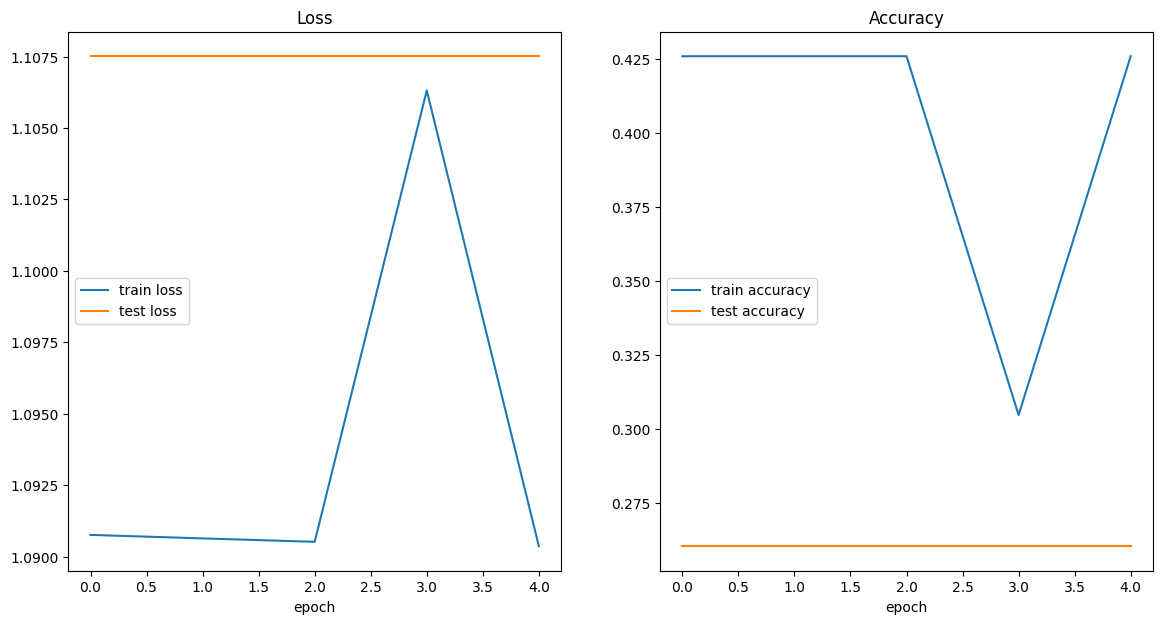

In [ ]:
plot_loss_curves(model_1_results)